<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: also termed visible layer, receives input from data.
### Hidden Layer: Layer between input and output. No direct interaction, as it only can be accessed via input layer.
### Output Layer: final output from neural network. typically a vector of predictions.
### Neuron:The basic unit of a neural network. Receives numerous inputs at varying weights, and provides a output.
### Weight: Strenght of a connection between layers. Could be seen as a bias distribution for all inputs.
### Activation Function: Activation functions introduce non-linearity into a neural network. Trigger for neural spike/firing.
### Node Map: Node maps are visual diagrams of the layout of a neural network.
### Perceptron: A perceptron is the simplest Neural Network consisting of a single node or neuron with nothing else taking any number of inputs which are integrated into a single output.


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

**An input is received by the network, and multiplied by a weight. A bias of 1 is introduced as another input to offset a case where all other inputs would be zero (input stimulus). A neuron will continue to fire if it fits a given activation function (eg Sigmoid). These steps then lead to an output.**

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [0]:
import pandas as pd
import numpy as np
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [0]:
##### Your Code Here #####
# Defining activation functions (sigmoid)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1-sx)

In [0]:
# inputs
i1 = df['x1'].to_list()
i2 = df['x2'].to_list()
inputs = np.array([i1,i2])
inputs

array([[0, 1, 0, 1],
       [0, 0, 1, 1]])

In [0]:
# outputs
outputs = np.array([df['y'].to_list()])
outputs

array([[1, 1, 1, 0]])

In [0]:
# random weights for each input
weights = np.random.random((4,1))
weights

array([[0.65434526],
       [0.73781127],
       [0.6010425 ],
       [0.44139222]])

In [0]:
# weighted sum of inputs and weights
weighted_sum = np.dot(inputs, weights)
weighted_sum

array([[1.17920348],
       [1.04243472]])

In [0]:
# sigmoid activation
activated_output = sigmoid(weighted_sum)
activated_output

array([[0.76480456],
       [0.73931951]])

In [0]:
# error
error = outputs - activated_output
error

array([[ 0.23519544,  0.23519544,  0.23519544, -0.76480456],
       [ 0.26068049,  0.26068049,  0.26068049, -0.73931951]])

In [0]:
# gradient descent/backpropagation
adjustments = error * sigmoid_derivative(weighted_sum)
adjustments

array([[ 0.04230661,  0.04230661,  0.04230661, -0.13757193],
       [ 0.05023995,  0.05023995,  0.05023995, -0.14248622]])

In [0]:
weights = weights + np.dot(inputs.T, adjustments)
weights

array([[0.65434526, 0.65434526, 0.65434526, 0.65434526],
       [0.78011788, 0.78011788, 0.78011788, 0.60023933],
       [0.65128245, 0.65128245, 0.65128245, 0.45855628],
       [0.53393878, 0.53393878, 0.53393878, 0.16133407]])

In [0]:
# iteration to reduce error
for iteration in range(10000):
    
    # Weighted sum of inputs / weights
    weighted_sum = np.dot(inputs, weights)
    
    # Activate!
    activated_output = sigmoid(weighted_sum)
    
    # Cac error
    error = outputs - activated_output
    
    adjustments = error * sigmoid_derivative(weighted_sum)
    
    # Update the Weights
    weights += np.dot(inputs.T, adjustments)
    
print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)

Weights after training
[[ 0.65434526  0.65434526  0.65434526  0.65434526]
 [ 2.13373186  2.13373186  2.13373186 -1.52679241]
 [ 2.12399057  2.12399057  2.12399057 -1.53406681]
 [ 3.36026088  3.36026088  3.36026088 -3.95832077]]
Output after training
[[0.99590523 0.99590523 0.99590523 0.00413114]
 [0.99586531 0.99586531 0.99586531 0.00410132]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [0]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


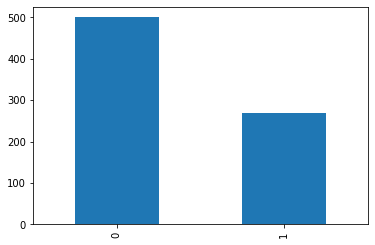

In [0]:
# plot outcome
%matplotlib inline
diabetes['Outcome'].value_counts().plot(kind='bar')

In [0]:
diabetes['Outcome'].describe()

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [0]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

feats = list(diabetes)[:-1]

# test splits
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

# scale the data
mmscaler = MinMaxScaler()

# fit the data
X_scaled = pd.DataFrame(mmscaler.fit_transform(X), columns=feats)
X_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [0]:
##### Update this Class #####

class Perceptron:
    
    def __init__(self, niter = 10):
        self.niter = niter
    
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def __sigmoid_derivative(self, x):
        sig_x = self.__sigmoid(x)
        return sig_x * (1 - sig_x)

    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # Randomly Initialize Weights
        self.weights = np.random.random((X.shape[1], 1))
        self.inputs = X.values.tolist()
        self.outputs = y.values.tolist()


        for i in range(self.niter):
            # Weighted sum of inputs / weights
            self.weighted_sum = np.dot(self.inputs, self.weights)

            # Activate!
            self.activated_outputs = self.__sigmoid(self.weighted_sum)

            # Cac error
            self.error = self.outputs - self.activated_outputs
            self.adjustments = self.error * self.__sigmoid_derivative(self.weighted_sum)

            # Update the Weights
            self.weights = self.weights + np.dot(np.array(self.inputs).T, self.adjustments)

        return self

    def net_input(self, X):
        return np.dot(X, self.weights)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)[0]

In [0]:
len(y)

768

In [0]:
from sklearn.metrics import accuracy_score

perc_neur = Perceptron(768)
perc_neur.fit(X_scaled, y)

y_predict = perc_neur.predict(X_scaled)
y_predict

array([ 1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
        1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1,
       -1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1,
       -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,
       -1,  1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,
        1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1,
        1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1, -1, -1, -1, -1

In [0]:
accuracy_score(y, y_predict)

0.3489583333333333

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?